In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import defaultdict

from io import StringIO

from ete3 import NCBITaxa

In [2]:
from matplotlib.pyplot import figure
from matplotlib.patches import Circle

from Bio import Phylo
from random import randint

from PhyloCircular import polar_plot
from PhyloCircular import Externals_labels, Externals_patchs, Externals_heatmap

### Load data

In [3]:
DATA_DIR = '../data/processed'

In [4]:
plant_data = pd.read_csv(f'{DATA_DIR}/plant_disease_collapsed.tsv', sep='\t')
plant_data = plant_data[plant_data['database'] != 'bern2']
plant_data.head(3)

/var/folders/61/bn_r735d70z03hg56wh7hsg80000gn/T/ipykernel_6825/357951436.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  plant_data = pd.read_csv(f'{DATA_DIR}/plant_disease_collapsed.tsv', sep='\t')


,plant_curie,plant_name,disease_curie,database,evidence
129539,ncbitaxon:103823,NaN,mondo:0005550,etm,"Engedasew Andarge, Abraham Shonga, Mathewos Ag..."
129540,ncbitaxon:103823,NaN,mondo:0005046,etm,"Engedasew Andarge, Abraham Shonga, Mathewos Ag..."
129541,ncbitaxon:107365,NaN,mondo:0002081,etm,"Araya, S., Abera, B., & Giday, M. (2015). Stud..."


In [5]:
plant_disease_data = pd.read_csv(
    f'{DATA_DIR}/non_binary_database_df.tsv', sep='\t', index_col='Unnamed: 0'
)
# plant_disease_data = plant_disease_data[plant_disease_data['database'] == 'bern2']
plant_disease_data.head(3)

,ncbitaxon:103823,ncbitaxon:107365,ncbitaxon:1090597,ncbitaxon:110835,ncbitaxon:1129974,ncbitaxon:1205696,ncbitaxon:1220069,ncbitaxon:1232590,ncbitaxon:123405,ncbitaxon:1236437,...,ncbitaxon:97307,ncbitaxon:97319,ncbitaxon:977953,ncbitaxon:979727,ncbitaxon:984478,ncbitaxon:98504,ncbitaxon:992642,ncbitaxon:99520,ncbitaxon:99570,ncbitaxon:99809
mondo:0005550,"{'Engedasew Andarge, Abraham Shonga, Mathewos ...",NaN,NaN,"{'Teklehaymanot, T., Giday, M., Medhin, G., & ...","{'Araya, S., Abera, B., & Giday, M. (2015). St...",NaN,NaN,"{'Megersa, M., Asfaw, Z., Kelbessa, E., Beyene...",NaN,"{'Birhanu, Z., Endale, A., & Shewamene, Z. (20...",...,NaN,NaN,NaN,{'From KoreanTK'},{'From KoreanTK'},NaN,{'From KoreanTK'},NaN,NaN,NaN
mondo:0005046,"{'Engedasew Andarge, Abraham Shonga, Mathewos ...","{'Araya, S., Abera, B., & Giday, M. (2015). St...",NaN,NaN,NaN,"{'Desta, B. (1993). Ethiopian traditional herb...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,{'From KoreanTK'},{'From KoreanTK'},NaN,NaN,{'From KoreanTK'}
mondo:0002081,NaN,"{'Araya, S., Abera, B., & Giday, M. (2015). St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,{'From KoreanTK'},NaN,NaN,NaN,{'From KoreanTK'}


In [6]:
plants = plant_disease_data.columns.tolist()

In [7]:
import ast

In [8]:
plant_disease_dict = defaultdict(int)

for index, row in tqdm(plant_disease_data.iterrows(), total=plant_disease_data.shape[0]):
    for plant_name, citations in row.items():
        if not isinstance(citations, str):
            continue
        citations = ast.literal_eval(citations)
        plant_disease_dict[f'{plant_name}_{index}'] += len(citations)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 124.76it/s]


In [9]:
list(plant_disease_dict.keys())

['ncbitaxon:103823_mondo:0005550',
 'ncbitaxon:110835_mondo:0005550',
 'ncbitaxon:1129974_mondo:0005550',
 'ncbitaxon:1232590_mondo:0005550',
 'ncbitaxon:1236437_mondo:0005550',
 'ncbitaxon:1242813_mondo:0005550',
 'ncbitaxon:1298700_mondo:0005550',
 'ncbitaxon:1300200_mondo:0005550',
 'ncbitaxon:13465_mondo:0005550',
 'ncbitaxon:159034_mondo:0005550',
 'ncbitaxon:1632797_mondo:0005550',
 'ncbitaxon:1665489_mondo:0005550',
 'ncbitaxon:1670852_mondo:0005550',
 'ncbitaxon:169279_mondo:0005550',
 'ncbitaxon:183238_mondo:0005550',
 'ncbitaxon:1874191_mondo:0005550',
 'ncbitaxon:191453_mondo:0005550',
 'ncbitaxon:198859_mondo:0005550',
 'ncbitaxon:198863_mondo:0005550',
 'ncbitaxon:2016425_mondo:0005550',
 'ncbitaxon:2024931_mondo:0005550',
 'ncbitaxon:204151_mondo:0005550',
 'ncbitaxon:2152782_mondo:0005550',
 'ncbitaxon:219240_mondo:0005550',
 'ncbitaxon:225019_mondo:0005550',
 'ncbitaxon:256486_mondo:0005550',
 'ncbitaxon:2676176_mondo:0005550',
 'ncbitaxon:2708_mondo:0005550',
 'ncbitax

In [10]:
# Fitering out edges without citation count greater than 3

plant_disease_dict = {
    i: j
    for i, j in plant_disease_dict.items()
    if j > 5
}
len(plant_disease_dict)

817

In [11]:
all_plants = set(
    i.split('_')[0]
    for i, _ in plant_disease_dict.items()
)
len(all_plants)

163

In [12]:
disease_areas_of_interest = [
    "mondo:0037940",  # auditory system disorder
    "mondo:0002657",  # breast disorder
    "mondo:0004992",  # cancer or benign tumor
    "mondo:0004995",  # cardiovascular disorder
    "mondo:0003900",  # connective tissue disorder
    "mondo:0004335",  # digestive system disorder
    "mondo:0021084",  # disorder of visual system
    "mondo:0005151",  # endocrine system disorder
    "mondo:0005570",  # hematologic disorder
    "mondo:0005046",  # immune system disorder
    "mondo:0021166",  # inflammatory disease
    "mondo:0021178",  # injury
    "mondo:0002051",  # integumentary system disorder
    "mondo:0005550",  # infectious disease or post-infectious disorder
    "mondo:0005066",  # metabolic disease
    "mondo:0002081",  # musculoskeletal system disorder
    "mondo:0005071",  # nervous system disorder
    "mondo:0005137",  # nutritional disorder
    "mondo:0024623",  # otorhinolaryngologic disease
    "mondo:0029000",  # poisoning
    "mondo:0002025",  # psychiatric disorder
    "mondo:0005087",  # respiratory system disorder
    "mondo:0002118",  # urinary system disorder
]

### Selection inflamtory diseases

In [13]:
disease_plant_list = plant_data[
    plant_data['disease_curie'] == 'mondo:0005137'
]['plant_curie'].unique().tolist()
len(disease_plant_list)

166

### Get lineage of each plant from NCBITaxon

In [14]:
ncbi = NCBITaxa()

### Generate Newick tree format

In [15]:
def newickify(node_to_children, root_node) -> str:
    visited_nodes = set()

    def newick_render_node(name, distance: float) -> str:
        if isinstance(name, str):
            name = name.replace(' ', '_')
        assert name not in visited_nodes, "Error: The tree may not be circular!"

        if name not in node_to_children:
            # Leafs
            return F'{name}:{distance}'
        else:
            # Nodes
            visited_nodes.add(name)
            children = node_to_children[name]
            children_strings = [newick_render_node(child, children[child]) for child in children.keys()]
            children_strings = ",".join(children_strings)
            return F'({children_strings}){name}:{distance}'

    newick_string = newick_render_node(root_node, 0) + ';'

    # Ensure no entries in the dictionary are left unused.
    assert visited_nodes == set(node_to_children.keys()), "Error: some nodes aren't in the tree"

    return newick_string

In [16]:
lineage_dict = defaultdict(dict)

for plant in tqdm(all_plants):
    tree = ncbi.get_lineage(plant.split(':')[1])
    for idx in range(len(tree) - 1):
        
        parent = tree[idx]
        
        child = tree[idx + 1]
                     
        lineage_dict[parent][child] = idx + 1

  0%|                                                                                                                                               | 0/163 [00:00<?, ?it/s]/Users/yojana/anaconda3/envs/kg-sources/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 48038 was translated into 2849586
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/yojana/anaconda3/envs/kg-sources/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 32224 was translated into 2843217
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 4102.39it/s]


In [17]:
string = newickify(lineage_dict, root_node=1)

In [18]:
biophylo_tree = Phylo.read(StringIO(string), "newick")

### Visualizing tree


/Users/yojana/Documents/GitHub/ethnobotany/notebooks/PhyloCircular/externals.py:196: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  wedge = Wedge((0, 0), depth, min_angle, max_angle, width=vertical_cell_size,


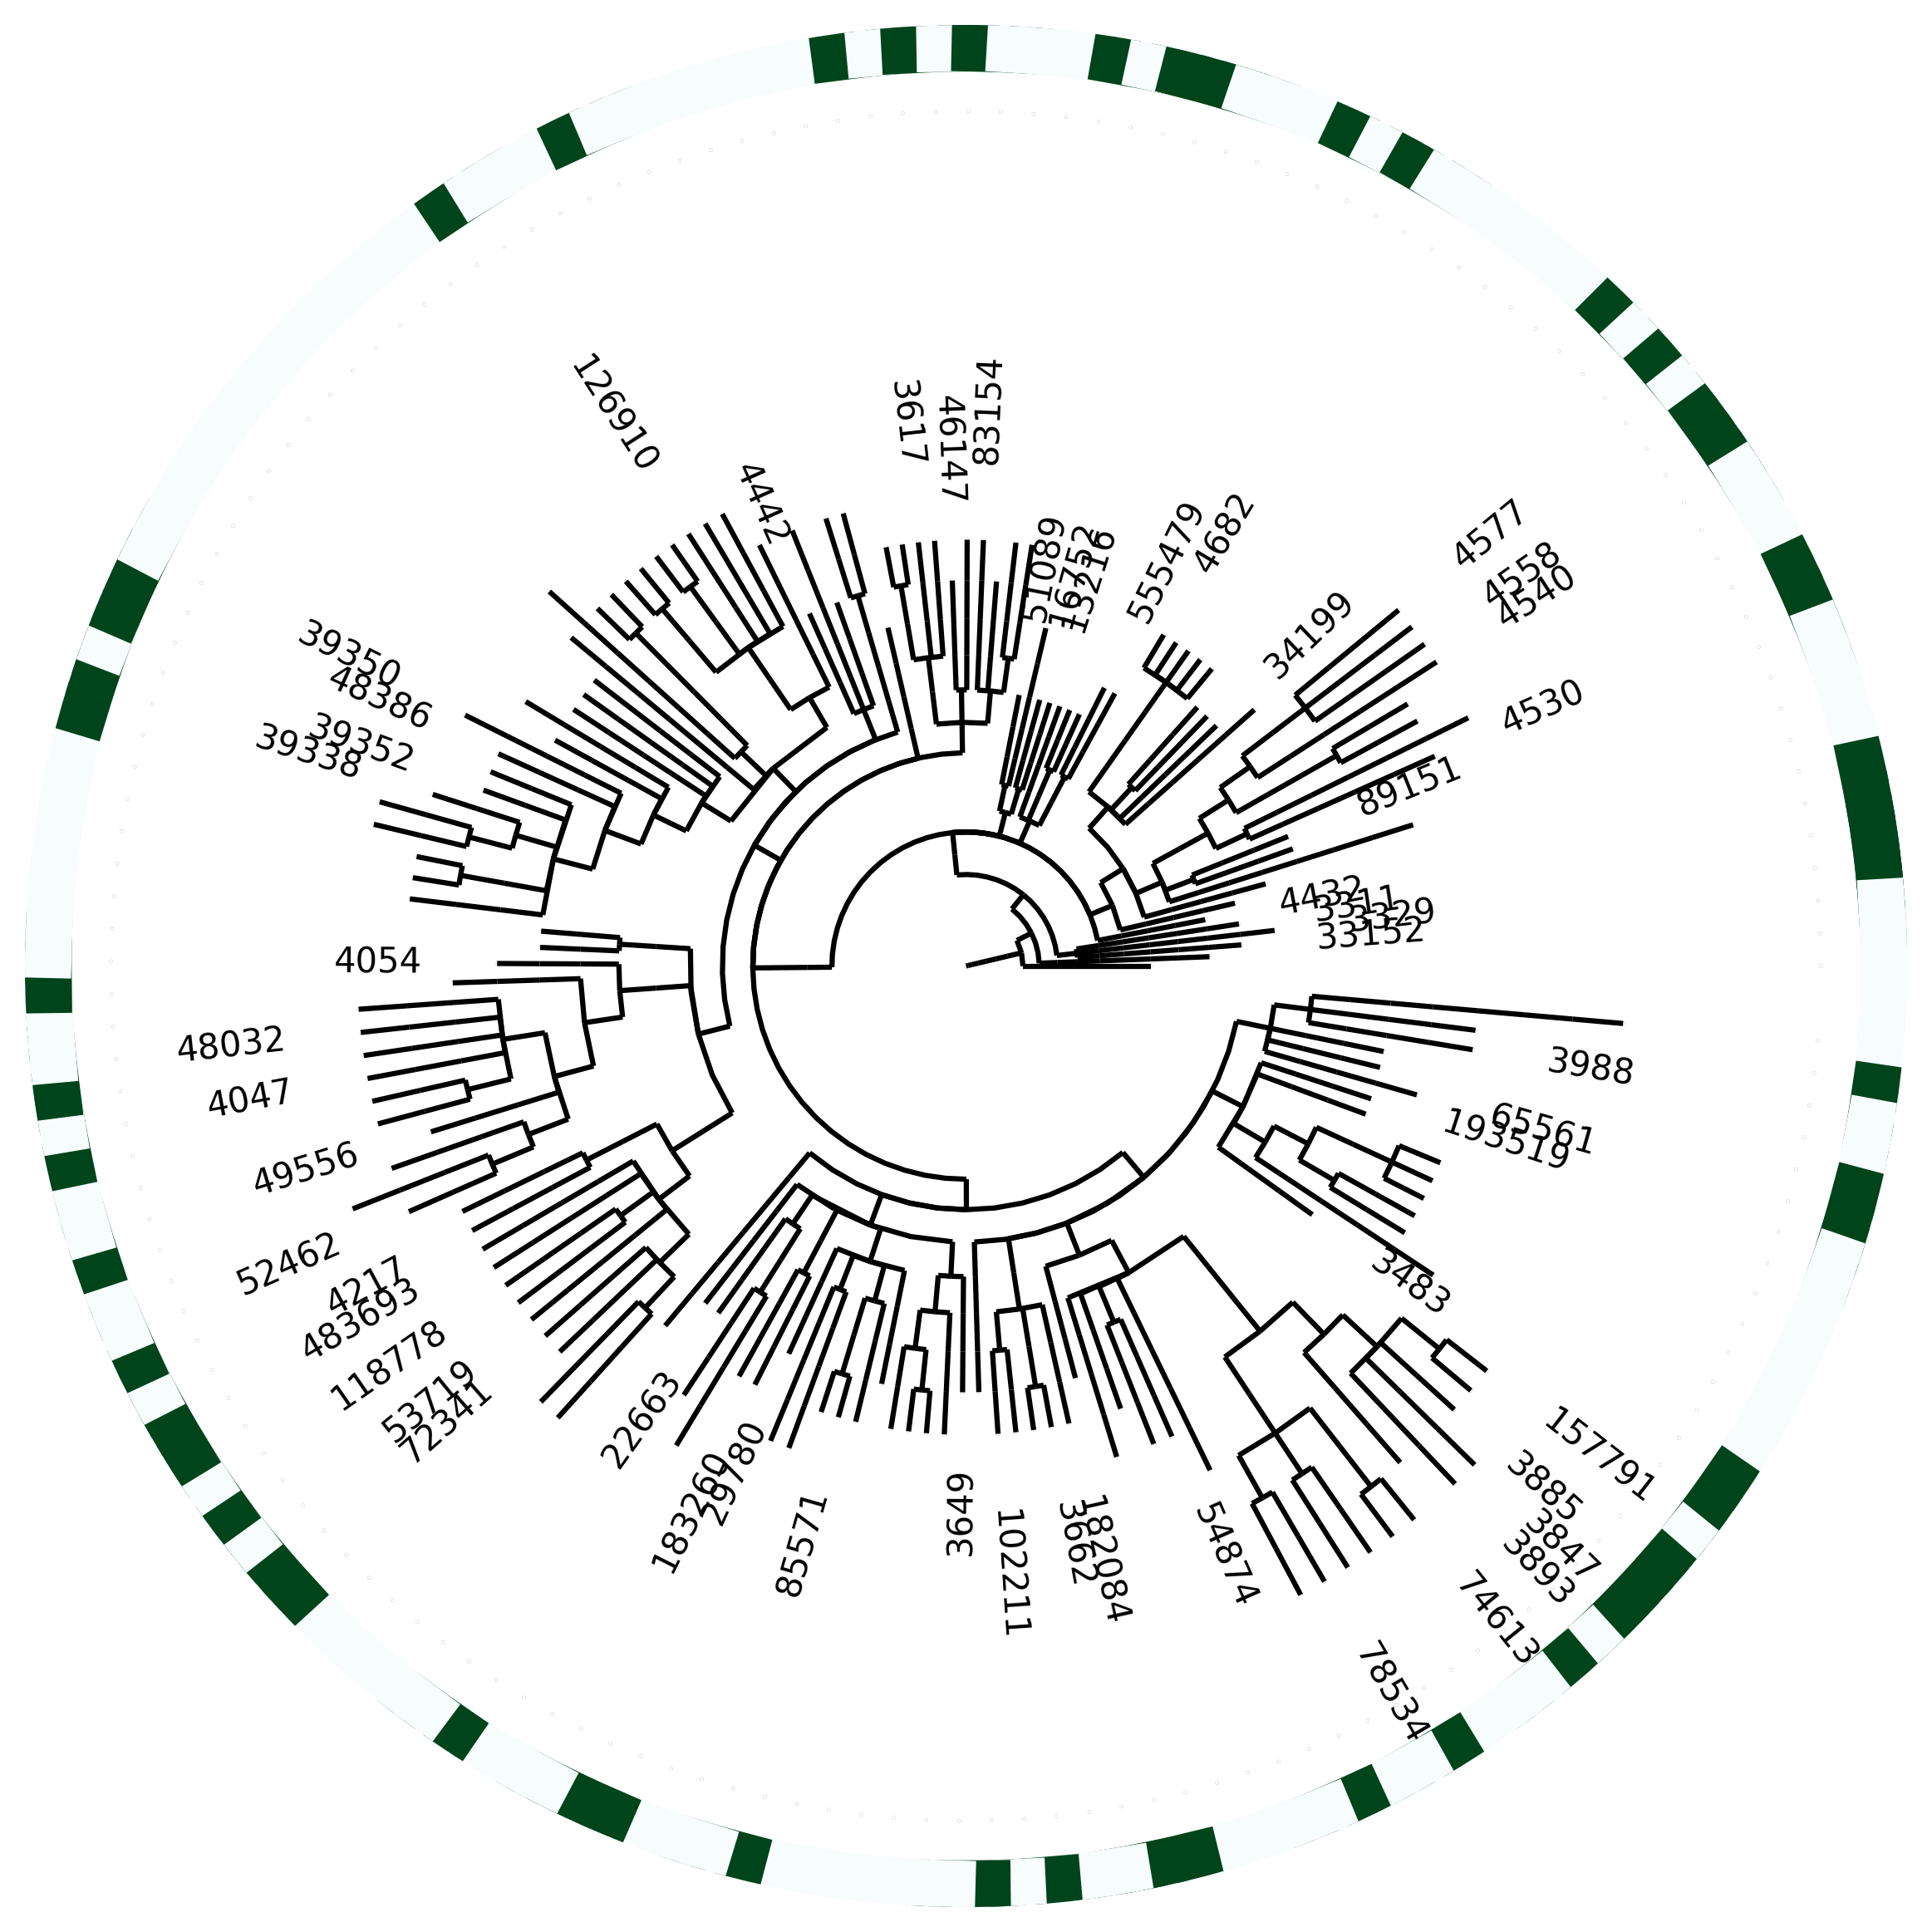

In [19]:
fig = figure(figsize=(10, 10), dpi=300)
fig.subplots_adjust(hspace = .5)


for clade in biophylo_tree.get_terminals() :
    clade.patch = lambda coordinates : Circle(coordinates, 0.01, color="black")

# heatmap data

labels = []
tp = []

hdata = {}
c = 0
for leaf in biophylo_tree.get_terminals():
    hdata.setdefault(leaf, {})
    
    # Get data from df
#     for i, j in plant_naming_dict.items():
#         if j == leaf.name.replace('_', ' '):
#             idx = i
#             break
            
    if f'ncbitaxon:{leaf}' in disease_plant_list:
        tp.append(f'ncbitaxon:{leaf}')
        labels.append(leaf.name)
        hdata[leaf]['Disease'] = 1
    else:
        hdata[leaf]['Disease'] = 0

# initialization and drawing
        
ax1 = fig.add_subplot(111, polar=True)

ep = Externals_patchs(bg_internal=True)
el = Externals_labels(size=2.8, bg_internal=True, offset=0.1, pad=0.1)
eh = Externals_heatmap(data=hdata, offset=0.5, size=4)
externals = [ep, el, eh]

ax1 = polar_plot(biophylo_tree, ax=ax1, pad_wedge=0, externals=externals,
    label_leaf=labels, patch_leaf=True, wedge=False)
